### enhancement to the main notebook, analyzing only beneficiaries that are hospice candidates ###


In [35]:
import glob
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt


3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.16.2
0.24.2


In [36]:
def df_write_csv(df, path):
    
    df.to_csv(path_or_buf = path, index=False)

In [37]:
bene_df = pd.read_csv("/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/beneficiary/bene_cohort.csv")
bene_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000102649ED5601B,1931-10-01,NaN,2,1,0,49,290,12,12,...,1,0.0,0.0,0.0,360.0,90.0,0.0,860.0,170.0,0.0
1,0002278C944E240A,1936-09-01,NaN,2,1,Y,34,250,12,12,...,2,0.0,0.0,0.0,2590.0,1530.0,0.0,5000.0,1230.0,0.0
2,000330E625C93700,1933-09-01,NaN,2,1,0,4,420,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,270.0,150.0,0.0
3,000374D5E110EDA6,1936-08-01,NaN,2,1,0,5,90,12,12,...,2,0.0,0.0,0.0,60.0,30.0,0.0,1090.0,360.0,0.0
4,0003950E4B4FEC8D,1940-11-01,NaN,2,2,0,19,420,12,12,...,2,0.0,0.0,0.0,3690.0,420.0,0.0,3590.0,960.0,0.0


In [38]:
bene_df['BENE_COUNT_OCCURENCE'] = 1
bene_df['BENE_HOSPICE_CANDIDATE'] = np.where((bene_df['SP_ALZHDMTA'] == 1)
                                 |(bene_df['SP_CHF'] == 1)
                                 |(bene_df['SP_CHRNKIDN'] == 1)
                                 |(bene_df['SP_CNCR'] == 1)
                                 |(bene_df['SP_COPD'] == 1)
                                 |(bene_df['SP_ISCHMCHT'] == 1)
                                 |(bene_df['SP_STRKETIA'] == 1)
                                 ,1,0)

bene_df["BENE_BIRTH_DT"] = pd.to_datetime(bene_df["BENE_BIRTH_DT"], format="%Y-%m-%d")
bene_df["BENE_DEATH_DT"] = pd.to_datetime(bene_df["BENE_DEATH_DT"], format="%Y-%m-%d")

bene_df_hospice = bene_df[bene_df.BENE_HOSPICE_CANDIDATE == 1]
bene_df_hospice = bene_df_hospice[(bene_df_hospice.BENE_HI_CVRAGE_TOT_MONS == 12) & (bene_df_hospice.BENE_SMI_CVRAGE_TOT_MONS == 12)]



In [39]:
bene_df_hospice.dtypes

DESYNPUF_ID                         object
BENE_BIRTH_DT               datetime64[ns]
BENE_DEATH_DT               datetime64[ns]
BENE_SEX_IDENT_CD                    int64
BENE_RACE_CD                         int64
BENE_ESRD_IND                       object
SP_STATE_CODE                        int64
BENE_COUNTY_CD                       int64
BENE_HI_CVRAGE_TOT_MONS              int64
BENE_SMI_CVRAGE_TOT_MONS             int64
BENE_HMO_CVRAGE_TOT_MONS             int64
PLAN_CVRG_MOS_NUM                    int64
SP_ALZHDMTA                          int64
SP_CHF                               int64
SP_CHRNKIDN                          int64
SP_CNCR                              int64
SP_COPD                              int64
SP_DEPRESSN                          int64
SP_DIABETES                          int64
SP_ISCHMCHT                          int64
SP_OSTEOPRS                          int64
SP_RA_OA                             int64
SP_STRKETIA                          int64
MEDREIMB_IP

In [40]:
bene_hospice_aggr = (bene_df_hospice.groupby('DESYNPUF_ID').agg(
    {
     'BENE_BIRTH_DT':'max',
     'BENE_DEATH_DT':'max',
     'BENE_SEX_IDENT_CD':'max',
     'BENE_RACE_CD': 'max',
     'SP_STATE_CODE': 'max',
     'BENE_COUNTY_CD': 'max',
     'BENE_HI_CVRAGE_TOT_MONS':'max',
     'BENE_SMI_CVRAGE_TOT_MONS':'max',
     'BENE_COUNT_OCCURENCE':'sum'
    }
    )
             .reset_index()
             .rename(columns={'BENE_BIRTH_DT':'BENE_BIRTH_DT_max',
                              'BENE_SEX_IDENT_CD':'BENE_SEX_IDENT_CD_max',
                              'BENE_RACE_CD': 'BENE_RACE_CD_max',
                              'SP_STATE_CODE': 'SP_STATE_CODE_max',
                              'BENE_HI_CVRAGE_TOT_MONS':'BENE_HI_CVRAGE_TOT_MONS_max',
                              'BENE_SMI_CVRAGE_TOT_MONS':'BENE_SMI_CVRAGE_TOT_MONS_max',
                              'BENE_COUNTY_CD':'BENE_COUNTY_CD_max'
                             }))



In [41]:
#get carrier, inpatient and outpatient aggregates 
car_aggr = pd.read_csv("/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/car_cohort_aggr.csv")
inp_aggr = pd.read_csv("/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/inp_cohort_aggr.csv")
outp_aggr = pd.read_csv("/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/outp_cohort_aggr.csv")


In [44]:
#now merge beneficiary, carrier claims, inpatient and outpatient by left join 
bene_car_df = pd.merge(bene_hospice_aggr, car_aggr, on='DESYNPUF_ID', how = 'left')
bene_car_inp_df = pd.merge(bene_car_df, inp_aggr, on='DESYNPUF_ID', how = 'left')
bene_car_inp_outp_df = pd.merge(bene_car_inp_df, outp_aggr, on='DESYNPUF_ID', how = 'left')
#should've differentiated inpatient and outpatient columns while creating those dataframes. Ah well!
bene_car_inp_outp_df = bene_car_inp_outp_df.rename(columns= {'CLM_ID_count_x': 'car_CLM_ID_count',
                                                            'CLM_ID_count_y': 'inp_CLM_ID_count',
                                                            'CLM_PMT_AMT_sum_x': 'inp_CLM_PMT_AMT_sum',
                                                            'NCH_PRMRY_PYR_CLM_PD_AMT_sum_x': 'inp_NCH_PRMRY_PYR_CLM_PD_AMT_sum',
                                                            'CLM_ID_count': 'outp_CLM_ID_count',
                                                            'CLM_PMT_AMT_sum_y': 'outp_CLM_PMT_AMT_sum',
                                                            'NCH_PRMRY_PYR_CLM_PD_AMT_sum_y':'outp_NCH_PRMRY_PYR_CLM_PD_AMT_sum'})



In [47]:
# Now check whether he actually availed hospice - by looking for inp/outp claims 
bene_car_inp_outp_df['HOSPICE_FLAG'] = np.where((bene_car_inp_outp_df['car_CLM_ID_count'] > 0)
                                 |(bene_car_inp_outp_df['inp_CLM_ID_count'] > 0)
                                 |(bene_car_inp_outp_df['outp_CLM_ID_count'] > 0)
                                 ,1,0)

In [13]:
bene_car_inp_outp_df.head()
print(bene_car_inp_outp_df.groupby('BENE_SEX_IDENT_CD_max').DESYNPUF_ID.count())
print(bene_car_inp_outp_df.groupby('BENE_RACE_CD_max').DESYNPUF_ID.count())


BENE_SEX_IDENT_CD_max
1    350009
2    465993
Name: DESYNPUF_ID, dtype: int64
BENE_RACE_CD_max
1    688522
2     80409
3     29826
5     17245
Name: DESYNPUF_ID, dtype: int64


In [48]:
#Now add state names
us_state_df = pd.read_csv("/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/us_states_codes.csv")
us_state_df.head()
bene_car_inp_outp_state_df = pd.merge(bene_car_inp_outp_df, us_state_df, on='SP_STATE_CODE_max')

#Now fill NaNs with 0
values = {'car_CLM_ID_count':0, 'NCH_PMT_AMT_sum': 0, 'inp_CLM_ID_count': 0, 'inp_CLM_PMT_AMT_sum': 0, 'outp_CLM_ID_count': 0}
bene_car_inp_outp_state_df.fillna(value=values,inplace=True)
bene_car_inp_outp_state_df.head()

df_write_csv(bene_car_inp_outp_state_df,"/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/bene_car_inp_outp_state_df.csv")


In [59]:
#Now add the county indicator 
us_state_county_df = pd.read_csv("/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/us_states_county_codes.txt")
us_state_county_df.head()
us_state_county_df['BENE_COUNTY_CD_max'] = us_state_county_df['BENE_COUNTY_CD_max'].apply(str)

#bene_car_inp_outp_state_df = pd.merge(bene_car_inp_outp_df, us_state_df, on='SP_STATE_CODE_max')
us_state_county_df.dtypes


County_name               object
County_State_name         object
BENE_COUNTY_CD_max        object
FIPS_State_county_code     int64
dtype: object

In [124]:
# Merge county into bene_car_inp_outp_state_df 

def convert_state_cd(s):
    
    if int(s/10) == 0:
        
        return '0'+str(s)
    else:
        return str(s)
    
def get_3digit_county_cd(s):
    
    if int(s/10) == 0:
        
        return '00'+str(s)
    elif int(s/100) == 0:
        
        return '0'+str(s)
    else:
        return str(s)
    
print(convert_state_cd(1))
print(convert_county_cd(1))

#BENE_COUNTY_CD_max

def get_3digit_county_cd(s):
    
    return convert_county_cd(s)


bene_car_inp_outp_state_df['STR_COUNTY_CD'] = bene_car_inp_outp_state_df['BENE_COUNTY_CD_max'].apply(get_3digit_county_cd)

bene_car_inp_outp_state_df['SSA_COUNTY_CD'] = bene_car_inp_outp_state_df['SP_STATE_CODE_max'].apply(str)+bene_car_inp_outp_state_df['STR_COUNTY_CD']
#bene_car_inp_outp_state_df.head(100)


01
001


In [169]:
#bene_car_inp_outp_state_df.dtypes
bene_car_inp_outp_state_county_df = pd.merge(bene_car_inp_outp_state_df, us_state_county_df, left_on='SSA_COUNTY_CD', right_on='BENE_COUNTY_CD_max', how = 'left')
#left_on='county_ID', right_on='countyid'

In [170]:
#Now add hospice indicator 
bene_car_inp_outp_state_county_df['HOSPICE_FLAG'] = np.where((bene_car_inp_outp_state_county_df['car_CLM_ID_count'] > 0)
                                 |(bene_car_inp_outp_state_county_df['inp_CLM_ID_count'] > 0)
                                 |(bene_car_inp_outp_state_county_df['outp_CLM_ID_count'] > 0)
                                 ,1,0)


bene_car_inp_outp_state_county_df['SSA_STATE_COUNTY'] = bene_car_inp_outp_state_county_df['County_State_name'] + '-' + \
                                                        bene_car_inp_outp_state_county_df['County_name']
df_write_csv(bene_car_inp_outp_state_county_df,"/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/beneficiary/bene_car_inp_outp_state_county_df.csv")

In [80]:
#bene_car_inp_outp_state_county_df[bene_car_inp_outp_state_county_df.SP_State_iso2a == 'CA'].groupby('SSA_STATE_COUNTY').count()

#bene_car_inp_outp_state_county_df.head()
#bene_car_inp_outp_state_county_df.groupby(['SP_State_iso2a','County_State_name']).count()


In [74]:
def county_counts(group):
    return group.County_name.value_counts().fillna(0)


In [125]:
by_race = bene_car_inp_outp_state_county_df[(bene_car_inp_outp_state_county_df.SP_State_iso2a == 'CA') & (bene_car_inp_outp_state_county_df.HOSPICE_FLAG == 1)].County_name.value_counts()
by_race.head(100)
#bene_car_inp_outp_state_county_df.BENE_RACE_CD_max.unique()

# by_race_hospice = bene_car_inp_outp_state_county_df[bene_car_inp_outp_state_county_df['HOSPICE_FLAG']==1].groupby('BENE_RACE_CD_max')
# by_race_hospice.head()
# by_race.SP_State_iso2a.value_counts()
# by_race_df = by_race[(by_race.BENE_RACE_CD_max == 1) & (by_race.SP_State_iso2a == 'CA')]
# by_race_df

by_race = bene_car_inp_outp_state_county_df[(bene_car_inp_outp_state_county_df.SP_State_iso2a == 'CA') & \
                                            (bene_car_inp_outp_state_county_df.HOSPICE_FLAG == 1)].groupby(['County_name','BENE_RACE_CD_max']).HOSPICE_FLAG.sum()

#by_race.head(400)

In [126]:
#pvt_table = pd.pivot_table(bene_car_inp_outp_state_county_df[bene_car_inp_outp_state_county_df.SP_State_iso2a == 'CA'], values='HOSPICE_FLAG', index=['County_name'], columns=['BENE_RACE_CD_max'], aggfunc=np.sum).fillna(0)
pvt_table = pd.pivot_table(bene_car_inp_outp_state_county_df, values='HOSPICE_FLAG', index=['SP_State_full_name'], columns=['BENE_RACE_CD_max'], aggfunc=np.sum).fillna(0)

#pvt_table.head(100)

In [127]:
# import seaborn as sns
# plt.figure(figsize=(8, 14))
# sns.heatmap(pvt_table, annot=True, cmap = 'Blues', alpha = .8)

In [171]:
# Total beneficiary and hospice beneficiary numbers by state

bene_county_group_by = (bene_car_inp_outp_state_county_df[bene_car_inp_outp_state_county_df.SP_State_iso2a == 'CA'].groupby(['County_name','BENE_RACE_CD_max']).agg(
    {
     'DESYNPUF_ID':'count',
     'HOSPICE_FLAG':'sum'
    }
    )
             .reset_index()
             .rename(columns={'DESYNPUF_ID':'DESYNPUF_ID_count',
                              'HOSPICE_FLAG':'HOSPICE_FLAG_sum'
                             }))

bene_county_group_by['percent_hospice'] = bene_county_group_by['HOSPICE_FLAG_sum']/bene_county_group_by['DESYNPUF_ID_count']


bene_county_group_by['NORM_TOT'] = (bene_county_group_by['DESYNPUF_ID_count']-bene_county_group_by['DESYNPUF_ID_count'].min())/(bene_country_group_by['DESYNPUF_ID_count'].max()-bene_country_group_by['DESYNPUF_ID_count'].min())
bene_county_group_by['NORM_HOSPICE_TOT'] = (bene_county_group_by['HOSPICE_FLAG_sum']-bene_county_group_by['HOSPICE_FLAG_sum'].min())/(bene_country_group_by['HOSPICE_FLAG_sum'].max()-bene_country_group_by['HOSPICE_FLAG_sum'].min())
bene_county_group_by['percent_hospice'] = bene_county_group_by['HOSPICE_FLAG_sum']*100/bene_county_group_by['DESYNPUF_ID_count']
bene_county_group_by['norm_percent_hospice'] = bene_county_group_by['NORM_HOSPICE_TOT']*100/bene_county_group_by['NORM_TOT']

#df_write_csv(bene_country_group_by,"/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/beneficiary/bene_hospice_cohort_country_groupby.csv")


bene_county_group_by.head()

,County_name,BENE_RACE_CD_max,DESYNPUF_ID_count,HOSPICE_FLAG_sum,percent_hospice,NORM_TOT,NORM_HOSPICE_TOT,norm_percent_hospice
0,ALAMEDA,1,1905,82,4.304462,0.150800,0.151571,100.511425
1,ALAMEDA,2,170,6,3.529412,0.013385,0.011091,82.857737
2,ALAMEDA,3,348,18,5.172414,0.027483,0.033272,121.063033
3,ALAMEDA,5,155,5,3.225806,0.012197,0.009242,75.773579
4,ALPINE,1,1,0,0.000000,0.000000,0.000000,NaN


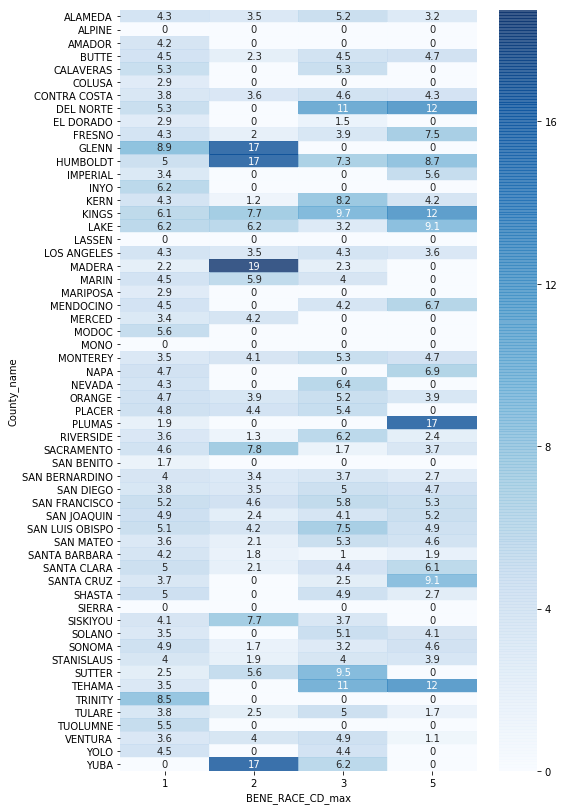

In [172]:
pvt_table = pd.pivot_table(bene_county_group_by, values='percent_hospice', index=['County_name'], columns=['BENE_RACE_CD_max'], aggfunc=np.max).fillna(0)

import seaborn as sns
plt.figure(figsize=(8, 14))
sns.heatmap(pvt_table, annot=True, cmap = 'Blues', alpha = .8)

In [182]:
# Total beneficiary and hospice beneficiary numbers by state - only top 5 states are considered


bene_state_group_by = (bene_car_inp_outp_state_county_df.groupby(['SP_State_full_name','BENE_RACE_CD_max']).agg(
    {
     'DESYNPUF_ID':'count',
     'HOSPICE_FLAG':'sum'
    }
    )
             .reset_index()
             .rename(columns={'DESYNPUF_ID':'DESYNPUF_ID_count',
                              'HOSPICE_FLAG':'HOSPICE_FLAG_sum'
                             }))



bene_state_group_by['NORM_TOT'] = (bene_state_group_by['DESYNPUF_ID_count']-bene_state_group_by['DESYNPUF_ID_count'].min())/(bene_state_group_by['DESYNPUF_ID_count'].max()-bene_state_group_by['DESYNPUF_ID_count'].min())
bene_state_group_by['NORM_HOSPICE_TOT'] = (bene_state_group_by['HOSPICE_FLAG_sum']-bene_state_group_by['HOSPICE_FLAG_sum'].min())/(bene_state_group_by['HOSPICE_FLAG_sum'].max()-bene_state_group_by['HOSPICE_FLAG_sum'].min())
bene_state_group_by['norm_percent_hospice'] = bene_state_group_by['NORM_HOSPICE_TOT']*100/bene_state_group_by['NORM_TOT']
bene_state_group_by['percent_hospice'] = bene_state_group_by['HOSPICE_FLAG_sum']*100/bene_state_group_by['DESYNPUF_ID_count']

#df_write_csv(bene_country_group_by,"/Users/nalinivineetha/Documents/MIDS/W200Python/PythonRoughWork/Project_2/files/beneficiary/bene_hospice_cohort_country_groupby.csv")

pvt_table = pd.pivot_table(bene_state_group_by, values=['DESYNPUF_ID_count','HOSPICE_FLAG_sum','percent_hospice','norm_percent_hospice'], index=['SP_State_full_name'], columns=['BENE_RACE_CD_max'], aggfunc=np.max).fillna(0)
pvt_table.head()
#pvt_table.T.unstack()
# import seaborn as sns
# plt.figure(figsize=(8, 14))
# sns.heatmap(pvt_table, annot=True, cmap = 'Blues', alpha = .8)

DESYNPUF_ID_count                         HOSPICE_FLAG_sum  \
BENE_RACE_CD_max                   1       2       3       5                1   
SP_State_full_name                                                              
Alabama                      12180.0  3553.0    82.0     1.0            577.0   
Alaska                         968.0    18.0   242.0     0.0             47.0   
Arizona                      12627.0   389.0   684.0   497.0            488.0   
Arkansas                      8951.0  1220.0   104.0    32.0            375.0   
California                   50991.0  4182.0  9158.0  4290.0           2165.0   

                                        norm_percent_hospice              \
BENE_RACE_CD_max        2      3      5                    1           2   
SP_State_full_name                                                         
Alabama             135.0    3.0    0.0           108.134936   86.748636   
Alaska                1.0   11.0    0.0           110.936185  134.261941   
Arizona              18.0   27.0   17.0            88.217730  105.886995   
Arkansas             50.0    1.0    2.0            95.633506   93.619893   
California          140.0  415.0  164.0            96.911370   76.427510   

                                           percent_hospice            \
BENE_RACE_CD_max             3           5               1         2   
SP_State_full_name                                                     
Alabama              84.535296    0.000000        4.737274  3.799606   
Alaska              104.178353    0.000000        4.855372  5.555556   
Arizona              90.228742   78.229236        3.864734  4.627249   
Arkansas             22.159738  147.255032        4.189476  4.098361   
California          103.441956   87.274957        4.245847  3.347681   

                                        
BENE_RACE_CD_max           3         5  
SP_State_full_name                      
Alabama             3.658537  0.000000  
Alaska              4.545455  0.000000  
Arizona             3.947368  3.420523  
Arkansas            0.961538  6.250000  
California          4.531557  3.822844

In [191]:
bene_car_inp_outp_state_county_df[bene_car_inp_outp_state_county_df.HOSPICE_FLAG == 1].SP_State_full_name.value_counts()

bene_state_group_by_1 = (bene_car_inp_outp_state_df.groupby(['SP_State_full_name']).agg(
    {
     'DESYNPUF_ID':'count',
     'HOSPICE_FLAG':'sum'
    }
    )
             .reset_index()
             .rename(columns={'DESYNPUF_ID':'DESYNPUF_ID_count',
                              'HOSPICE_FLAG':'HOSPICE_FLAG_sum'
                             }))

bene_state_group_by_1['percent_hospice'] = bene_state_group_by_1['HOSPICE_FLAG_sum']*100/bene_state_group_by_1['DESYNPUF_ID_count']

bene_state_group_by_1 = bene_state_group_by_1[bene_state_group_by_1.HOSPICE_FLAG_sum > 1500].sort_values('HOSPICE_FLAG_sum', ascending = False)

bene_car_pvt_table = pd.merge(bene_state_group_by_1, pvt_table, on='SP_State_full_name')
bene_car_pvt_table.rename(columns={"('DESYNPUF_ID_count', 1)": "DESYNPUF_ID_count_1"})
bene_car_pvt_table.columns

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Index([       'SP_State_full_name',         'DESYNPUF_ID_count',
                'HOSPICE_FLAG_sum',           'percent_hospice',
          ('DESYNPUF_ID_count', 1),    ('DESYNPUF_ID_count', 2),
          ('DESYNPUF_ID_count', 3),    ('DESYNPUF_ID_count', 5),
           ('HOSPICE_FLAG_sum', 1),     ('HOSPICE_FLAG_sum', 2),
           ('HOSPICE_FLAG_sum', 3),     ('HOSPICE_FLAG_sum', 5),
       ('norm_percent_hospice', 1), ('norm_percent_hospice', 2),
       ('norm_percent_hospice', 3), ('norm_percent_hospice', 5),
            ('percent_hospice', 1),      ('percent_hospice', 2),
            ('percent_hospice', 3),      ('percent_hospice', 5)],
      dtype='object')

In [192]:
new_pivot_table = bene_car_pvt_table[("SP_State_full_name","DESYNPUF_ID_count_1")].copy()
sns.heatmap(bene_car_pvt_table, annot=True, cmap = 'Blues', alpha = .8)

KeyError: ('SP_State_full_name', 'DESYNPUF_ID_count_1')